In [1]:
#!pip install opencv-python
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Funkcja do tworzenia obrazu z tekstem
def make_image(size, text, x_position, y_position, font, font_scale, color, thickness):
    image = np.ones(size, dtype=np.uint8)  # Białe tło
    image = cv.putText(image, text, (x_position, y_position), font, font_scale, color, thickness)
    return image

In [3]:
# Funkcja do tworzenia dwóch udziałów (shares)
def make_parts(image):
    part_1 = np.ones((image.shape[0], 2 * image.shape[1]), dtype=np.uint8)
    part_2 = np.ones((image.shape[0], 2 * image.shape[1]), dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):    
            p = np.random.random()
            if (image[i, j] == 1 and p < 0.5):
                part_1[i, 2*j] = 1
                part_1[i, 2*j+1] = 0
                part_2[i, 2*j] = 1
                part_2[i, 2*j+1] = 0
            elif (image[i, j] == 1 and p >= 0.5):
                part_1[i, 2*j] = 0
                part_1[i, 2*j+1] = 1
                part_2[i, 2*j] = 0
                part_2[i, 2*j+1] = 1
            elif (image[i, j] == 0 and p < 0.5):
                part_1[i, 2*j] = 1
                part_1[i, 2*j+1] = 0
                part_2[i, 2*j] = 0
                part_2[i, 2*j+1] = 1
            elif (image[i, j] == 0 and p >= 0.5):
                part_1[i, 2*j] = 0
                part_1[i, 2*j+1] = 1
                part_2[i, 2*j] = 1
                part_2[i, 2*j+1] = 0

    return part_1, part_2

In [23]:
# Funkcja do złożenia dwóch udziałów w jeden obraz
def combine_parts(part_1, part_2, typ):
    if typ == "i":
        combined = np.logical_and(part_1, part_2)
    else:
        combined = np.logical_not(np.logical_xor(part_1, part_2)).astype(np.uint8)
    return combined

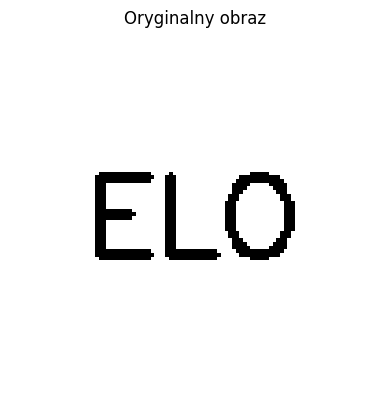

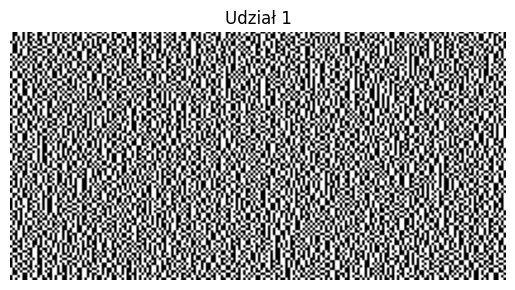

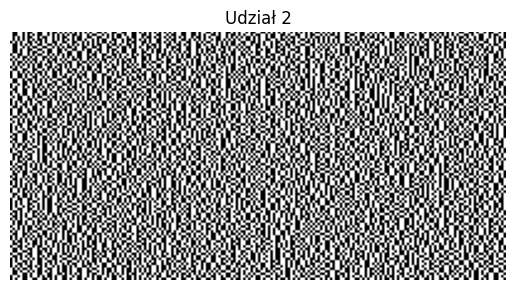

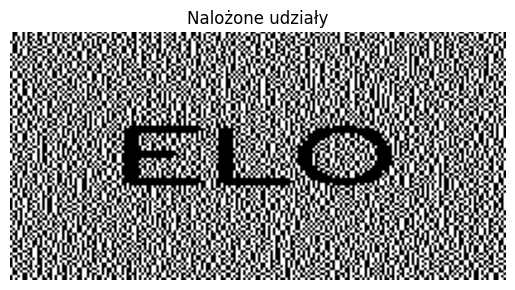

In [25]:
# obraz wejściowy
image = make_image(
    size=(100, 100),
    text="ELO",
    x_position=20,
    y_position=60,
    font=cv.FONT_ITALIC,
    font_scale=1,
    color=(0, 0, 0),
    thickness=2
)

# oryginalny obraz
#plt.figure(figsize=(5,5))
plt.title("Oryginalny obraz")
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

# tworzenie udzialow
part_1, part_2 = make_parts(image)

# udział 1
#plt.figure(figsize=(5,5))
plt.title("Udział 1")
plt.imshow(part_1 * 255, cmap="gray")
plt.axis('off')
plt.show()

# udział 2
#plt.figure(figsize=(5,5))
plt.title("Udział 2")
plt.imshow(part_2 * 255, cmap="gray")
plt.axis('off')
plt.show()

# polaczenie udzialow
decrypted = combine_parts(part_1, part_2, "i")

#plt.figure(figsize=(5,5))
plt.title("Nalożone udziały")
plt.imshow(decrypted * 255, cmap="gray")
plt.axis('off')
plt.show()

# polaczony obraz
#plt.figure(figsize=(5,5))
#plt.title("Nałożone udziały (odzyskany obraz)")
#plt.imshow(decrypted * 255, cmap="gray")
#plt.axis('off')
#plt.show()